<a href="https://colab.research.google.com/github/O-Kpy/Dacon/blob/main/Dacon_%EC%A0%84%EB%A0%A5%EC%82%AC%EC%9A%A9%EB%9F%89_%EC%98%88%EC%B8%A1_AI_%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C_%EC%A0%84%EB%A0%A5%EC%82%AC%EC%9A%A9%EB%9F%89%EC%97%90_%EB%8C%80%ED%95%9C_%EB%B3%80%EC%88%98_%EB%8D%94_%EC%B0%BE%EC%95%84%EB%B3%B4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib as mpl

In [2]:
!apt-get update -qq  ## 나눔 설치
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 160706 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [43]:
import matplotlib.font_manager as fm   ## 폰트 매니저
fontpath = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' 
font = fm.FontProperties(fname=fontpath, size=9).get_name()
plt.rc('font', family=font) 
mpl.font_manager._rebuild()

In [39]:
train = pd.read_csv('/content/drive/MyDrive/dataset/Dacon/대회/전력사용량 예측 AI 경진대회/train.csv', encoding='cp949')
test = pd.read_csv('/content/drive/MyDrive/dataset/Dacon/대회/전력사용량 예측 AI 경진대회/test.csv', encoding='cp949')
submission = pd.read_csv('/content/drive/MyDrive/dataset/Dacon/대회/전력사용량 예측 AI 경진대회/sample_submission.csv', encoding='cp949')
print(train.shape, test.shape, submission.shape)

(122400, 10) (10080, 9) (10080, 2)


In [4]:
train

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0
122396,60,2020-08-24 20,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0
122397,60,2020-08-24 21,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0
122398,60,2020-08-24 22,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0


In [40]:
train[['num', '비전기냉방설비운영','태양광보유']]
ice={}
hot={}
count=0
for i in range(0, len(train), len(train)//60):
    count +=1
    ice[count]=train.loc[i,'비전기냉방설비운영']
    hot[count]=train.loc[i,'태양광보유']
    

for i in range(len(test)):
    test.loc[i, '비전기냉방설비운영']=ice[test['num'][i]]
    test.loc[i, '태양광보유']=hot[test['num'][i]]

In [41]:
#시간 변수와 요일 변수를 추가해봅니다.
def time(x):
    return int(x[-2:])
train['time']=train['date_time'].apply(lambda x: time(x))
test['time']=test['date_time'].apply(lambda x: time(x))

In [42]:
# test 결측치 보간해줍니다.
# test 데이터의 변수는 예보 데이터이며, 예보 데이터는 train 데이터의 기간에 생성된 것이기에 활용 가능합니다.

test = test.interpolate(method='values')

In [ ]:
train['date_time'] = pd.to_datetime(train['date_time'])
test['date_time'] = pd.to_datetime(test['date_time'])

In [ ]:
train['days'] = train['date_time'].dt.day
test['days'] = train['date_time'].dt.day

In [ ]:
train

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,time,days
0,1,2020-06-01 00:00:00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0,0,1
1,1,2020-06-01 01:00:00,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0,1,1
2,1,2020-06-01 02:00:00,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0,2,1
3,1,2020-06-01 03:00:00,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0,3,1
4,1,2020-06-01 04:00:00,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19:00:00,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0,19,24
122396,60,2020-08-24 20:00:00,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0,20,24
122397,60,2020-08-24 21:00:00,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0,21,24
122398,60,2020-08-24 22:00:00,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0,22,24


ValueError: ignored

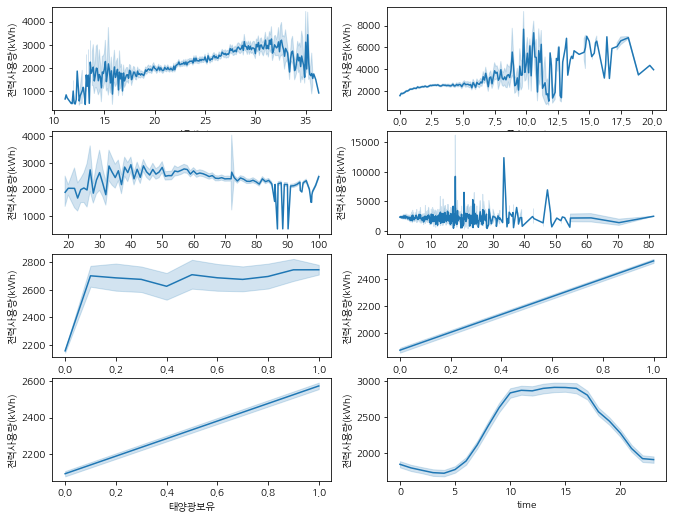

In [ ]:
fig = plt.figure(figsize=(11,11))
for j,i in enumerate(train.columns):
  if i in ['num','date_time', '전력사용량(kWh)']:
    continue
  ax = plt.subplot(5,2, j)
  sns.lineplot(x=i, y='전력사용량(kWh)', data=train, ax=ax)
plt.tight_layout()

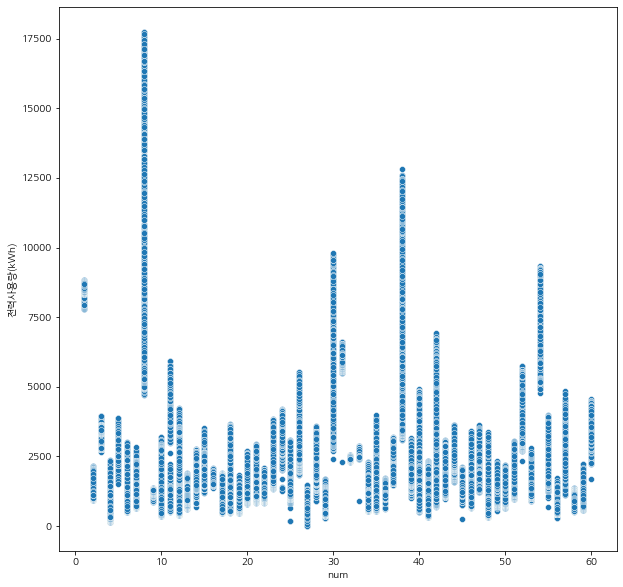

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='num', y='전력사용량(kWh)', data=train)

In [43]:
train['THI'] = 9/5*train['기온(°C)']-0.55*(1-train['습도(%)']/100)*(9/5*train['기온(°C)']-26)+32  # 불쾌지수
test['THI'] = 9/5*test['기온(°C)']-0.55*(1-test['습도(%)']/100)*(9/5*test['기온(°C)']-26)+32

In [10]:
train

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,time,THI
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0,0,63.43008
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0,1,63.56993
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0,2,63.22775
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0,3,62.54339
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0,4,62.39760
...,...,...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0,19,77.80896
122396,60,2020-08-24 20,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0,20,77.44917
122397,60,2020-08-24 21,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0,21,77.44917
122398,60,2020-08-24 22,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0,22,77.52246


In [44]:
# CDH feature추가
def CDH(xs):
    ys = []
    for i in range(len(xs)):
        if i < 11:
            ys.append(np.sum(xs[:(i+1)]-26))
        else:
            ys.append(np.sum(xs[(i-11):(i+1)]-26))
    return np.array(ys)

cdhs = np.array([])
for num in range(1,61,1):
    temp = train[train['num'] == num]
    cdh = CDH(temp['기온(°C)'].values)
    cdhs = np.concatenate([cdhs, cdh])
train['CDH'] = cdhs

cdhs = np.array([])
for num in range(1,61,1):
    temp = test[test['num'] == num]
    cdh = CDH(temp['기온(°C)'].values)
    cdhs = np.concatenate([cdhs, cdh])
test['CDH'] = cdhs

In [7]:
train['부패지수'] = ((train['습도(%)']-65)/14)*1.054**train['기온(°C)']
test['부패지수'] = ((test['습도(%)']-65)/14)*1.054**test['기온(°C)']

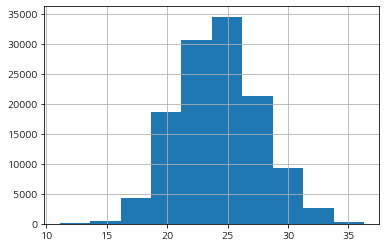

In [ ]:
train['기온(°C)'].hist()
# 동상은 고려 안해도 될듯

# 건물별로 군집을 시킨다.

In [13]:
train['date_time'] = pd.to_datetime(train['date_time'])
train['hour'] = train['date_time'].dt.hour
train['date'] = train['date_time'].dt.date
train['day'] = train['date_time'].dt.day
train['month'] = train['date_time'].dt.month


test['date_time'] = pd.to_datetime(test['date_time'])
test['hour'] = test['date_time'].dt.hour
test['date'] = test['date_time'].dt.date
test['day'] = test['date_time'].dt.day
test['month'] = test['date_time'].dt.month

In [47]:
train['date_time'] = pd.to_datetime(train['date_time'])
train['weekday'] = train['date_time'].dt.weekday
train['weekend'] = train['weekday'].isin([5,6]).astype(int)
train['hour'] = train['date_time'].dt.hour

test['date_time'] = pd.to_datetime(test['date_time'])
test['weekday'] = test['date_time'].dt.weekday
test['weekend'] = test['weekday'].isin([5,6]).astype(int)
test['hour'] = test['date_time'].dt.hour

In [ ]:
train['weekday'] = train['date_time'].dt.weekday + 1
train['hour'] = train['date_time'].dt.hour

test['weekday'] = test['date_time'].dt.weekday + 1
test['hour'] = test['date_time'].dt.hour

In [48]:
from sklearn.cluster import k_means, KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

d_list = []
for i in range(1, 61):
    d = train[train['num'] == i].copy()
    d['전력사용량(kWh)'] = scaler.fit_transform(d['전력사용량(kWh)'].values.reshape(-1,1))
    d_ = d.groupby(['weekday', 'hour'])['전력사용량(kWh)'].mean().unstack()
    d_list.append(d_.to_numpy())

# 정규화된 시간-요일별 전력사용량을 이미지처럼 저장
d_list = np.array(d_list)

d_list_ = d_list.reshape(60, -1)
model = KMeans(init="k-means++", n_clusters=4, random_state=0)
model.fit(d_list_)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

cluster = model.labels_
pd.DataFrame(cluster).value_counts()

1    31
2    17
3     7
0     5
dtype: int64

In [49]:
cluster_map = {i+1 : c for i, c in enumerate(cluster)}
train['cluster'] = train['num'].map(cluster_map)
test['cluster'] = test['num'].map(cluster_map)

In [51]:
x_train = train.drop(columns=['date_time', '전력사용량(kWh)'])
y_train = train['전력사용량(kWh)']
x_test = test.drop(columns=['date_time'])

In [52]:
x_train.shape, x_test.shape, y_train.shape

((122400, 15), (10080, 15), (122400,))

In [53]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgbm
import xgboost as xgb

In [54]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=40)
preds_lgbm = np.zeros((len(x_test)))
param_lgbms = {'learning_rate': 0.03751655787285152, 'min_data_in_leaf': 956, 'max_depth': 8, 'num_leaves': 67, "random_state": 42, "n_jobs": -1,}


for i,(train_index, test_index) in enumerate(skf.split(x_train, x_train['num'])):
  X_train, X_valid = x_train.iloc[train_index], x_train.iloc[test_index]
  Y_train, Y_valid = y_train.iloc[train_index], y_train.iloc[test_index]

  model = lgbm.LGBMRegressor(n_estimators=10000, objective='mse')
  model.fit(X_train, Y_train, eval_set=[(X_train, Y_train), (X_valid, Y_valid)], eval_metric='rmse', early_stopping_rounds=50, verbose=100)

  preds_lgbm += model.predict(x_test) / skf.n_splits

  

Training until validation scores don't improve for 50 rounds.
[100]	training's l2: 93524	training's rmse: 305.817	valid_1's l2: 98954.6	valid_1's rmse: 314.57
[200]	training's l2: 64284.4	training's rmse: 253.544	valid_1's l2: 73719.4	valid_1's rmse: 271.513
[300]	training's l2: 52726.1	training's rmse: 229.622	valid_1's l2: 63847.6	valid_1's rmse: 252.681
[400]	training's l2: 45947.5	training's rmse: 214.354	valid_1's l2: 58583	valid_1's rmse: 242.039
[500]	training's l2: 41103.5	training's rmse: 202.74	valid_1's l2: 54969.2	valid_1's rmse: 234.455
[600]	training's l2: 37860.4	training's rmse: 194.577	valid_1's l2: 52658.1	valid_1's rmse: 229.473
[700]	training's l2: 34954.6	training's rmse: 186.961	valid_1's l2: 50605.7	valid_1's rmse: 224.957
[800]	training's l2: 32306.2	training's rmse: 179.739	valid_1's l2: 48768.4	valid_1's rmse: 220.836
[900]	training's l2: 30167.3	training's rmse: 173.687	valid_1's l2: 47699.6	valid_1's rmse: 218.402
[1000]	training's l2: 28652.4	training's rms

KeyboardInterrupt: ignored

In [22]:
!pip install optuna

     |████████████████████████████████| 296kB 2.1MB/s 
     |████████████████████████████████| 81kB 3.1MB/s 
     |████████████████████████████████| 174kB 3.6MB/s 
     |████████████████████████████████| 143kB 3.9MB/s 
     |████████████████████████████████| 112kB 4.1MB/s 
     |████████████████████████████████| 51kB 2.6MB/s 
     |████████████████████████████████| 81kB 3.6MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-cp37-none-any.whl size=11107 sha256=df453a8f44b31016efc7aaed42767b5a0a73a8ed75d5ac913c202754e9aa34b2
  Stored in directory: /root/.cache/pip/wheels/25/af/b8/3407109267803f4015e1ee2ff23be0c8c19ce4008665931ee1
Successfully built pyperclip


In [24]:
import optuna
from lightgbm import LGBMClassifier
from optuna import Trial
from optuna.samplers import TPESampler
from sklearn.metrics import mean_squared_error


def objective(trial: Trial) -> float:
    params_lgb = {
        "random_state": 42,
        "n_jobs": -1,
        "learning_rate": trial.suggest_float('learning_rate', 0.0001, 0.1),
        'min_data_in_leaf':trial.suggest_int('min_data_in_leaf', 100, 1000),
        "max_depth": trial.suggest_int("max_depth", 1, 10),
        "num_leaves": trial.suggest_int("num_leaves", 2, 110)
    }
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=40)
    preds_lgbm = np.zeros((len(x_test)))
    for i,(train_index, test_index) in enumerate(skf.split(x_train, x_train['num'])):
      X_train, X_valid = x_train.iloc[train_index], x_train.iloc[test_index]
      Y_train, Y_valid = y_train.iloc[train_index], y_train.iloc[test_index]

      model = lgbm.LGBMRegressor(n_estimators=10000, objective='mse')
      model.fit(X_train, Y_train, eval_set=[(X_train, Y_train), (X_valid, Y_valid)], eval_metric='rmse', early_stopping_rounds=50, verbose=100)

  
      lgb_pred = model.predict(X_valid)
      RMSE=mean_squared_error(Y_valid, lgb_pred, squared=False)**0.5
      print(RMSE)
    
    return RMSE

In [25]:
sampler = TPESampler(seed=42)
study = optuna.create_study(
    study_name="lgb_parameter_opt",
    direction="minimize",
    sampler=sampler,
)
study.optimize(objective, n_trials=5)
print("Best Score:", study.best_value)
print("Best trial:", study.best_trial.params)

[I 2021-05-31 09:26:04,331] A new study created in memory with name: lgb_parameter_opt


Training until validation scores don't improve for 50 rounds.
[100]	training's l2: 82783.4	training's rmse: 287.721	valid_1's l2: 87367.3	valid_1's rmse: 295.58
[200]	training's l2: 54271.9	training's rmse: 232.963	valid_1's l2: 61482.3	valid_1's rmse: 247.956
[300]	training's l2: 43303.7	training's rmse: 208.096	valid_1's l2: 52215.2	valid_1's rmse: 228.507
[400]	training's l2: 36479.5	training's rmse: 190.996	valid_1's l2: 46353.8	valid_1's rmse: 215.299
[500]	training's l2: 31129.8	training's rmse: 176.436	valid_1's l2: 41728.9	valid_1's rmse: 204.276
[600]	training's l2: 27705.1	training's rmse: 166.449	valid_1's l2: 39055.3	valid_1's rmse: 197.624
[700]	training's l2: 25060.2	training's rmse: 158.304	valid_1's l2: 37137.5	valid_1's rmse: 192.711
[800]	training's l2: 23122.1	training's rmse: 152.06	valid_1's l2: 35762.6	valid_1's rmse: 189.11
[900]	training's l2: 21690.5	training's rmse: 147.277	valid_1's l2: 34883.3	valid_1's rmse: 186.771
[1000]	training's l2: 20541.5	training's 

[I 2021-05-31 09:31:27,358] Trial 0 finished with value: 12.32775981965466 and parameters: {'learning_rate': 0.03751655787285152, 'min_data_in_leaf': 956, 'max_depth': 8, 'num_leaves': 67}. Best is trial 0 with value: 12.32775981965466.


12.32775981965466
Training until validation scores don't improve for 50 rounds.
[100]	training's l2: 82783.4	training's rmse: 287.721	valid_1's l2: 87367.3	valid_1's rmse: 295.58
[200]	training's l2: 54271.9	training's rmse: 232.963	valid_1's l2: 61482.3	valid_1's rmse: 247.956
[300]	training's l2: 43303.7	training's rmse: 208.096	valid_1's l2: 52215.2	valid_1's rmse: 228.507
[400]	training's l2: 36479.5	training's rmse: 190.996	valid_1's l2: 46353.8	valid_1's rmse: 215.299
[500]	training's l2: 31129.8	training's rmse: 176.436	valid_1's l2: 41728.9	valid_1's rmse: 204.276
[600]	training's l2: 27705.1	training's rmse: 166.449	valid_1's l2: 39055.3	valid_1's rmse: 197.624
[700]	training's l2: 25060.2	training's rmse: 158.304	valid_1's l2: 37137.5	valid_1's rmse: 192.711
[800]	training's l2: 23122.1	training's rmse: 152.06	valid_1's l2: 35762.6	valid_1's rmse: 189.11
[900]	training's l2: 21690.5	training's rmse: 147.277	valid_1's l2: 34883.3	valid_1's rmse: 186.771
[1000]	training's l2: 2

[I 2021-05-31 09:36:25,261] Trial 1 finished with value: 12.32775981965466 and parameters: {'learning_rate': 0.01568626218019941, 'min_data_in_leaf': 240, 'max_depth': 1, 'num_leaves': 96}. Best is trial 0 with value: 12.32775981965466.


12.32775981965466
Training until validation scores don't improve for 50 rounds.
[100]	training's l2: 82783.4	training's rmse: 287.721	valid_1's l2: 87367.3	valid_1's rmse: 295.58
[200]	training's l2: 54271.9	training's rmse: 232.963	valid_1's l2: 61482.3	valid_1's rmse: 247.956
[300]	training's l2: 43303.7	training's rmse: 208.096	valid_1's l2: 52215.2	valid_1's rmse: 228.507
[400]	training's l2: 36479.5	training's rmse: 190.996	valid_1's l2: 46353.8	valid_1's rmse: 215.299
[500]	training's l2: 31129.8	training's rmse: 176.436	valid_1's l2: 41728.9	valid_1's rmse: 204.276
[600]	training's l2: 27705.1	training's rmse: 166.449	valid_1's l2: 39055.3	valid_1's rmse: 197.624
[700]	training's l2: 25060.2	training's rmse: 158.304	valid_1's l2: 37137.5	valid_1's rmse: 192.711
[800]	training's l2: 23122.1	training's rmse: 152.06	valid_1's l2: 35762.6	valid_1's rmse: 189.11
[900]	training's l2: 21690.5	training's rmse: 147.277	valid_1's l2: 34883.3	valid_1's rmse: 186.771
[1000]	training's l2: 2

[I 2021-05-31 09:41:20,159] Trial 2 finished with value: 12.32775981965466 and parameters: {'learning_rate': 0.060151389673146566, 'min_data_in_leaf': 737, 'max_depth': 1, 'num_leaves': 107}. Best is trial 0 with value: 12.32775981965466.


12.32775981965466
Training until validation scores don't improve for 50 rounds.
[100]	training's l2: 82783.4	training's rmse: 287.721	valid_1's l2: 87367.3	valid_1's rmse: 295.58
[200]	training's l2: 54271.9	training's rmse: 232.963	valid_1's l2: 61482.3	valid_1's rmse: 247.956
[300]	training's l2: 43303.7	training's rmse: 208.096	valid_1's l2: 52215.2	valid_1's rmse: 228.507
[400]	training's l2: 36479.5	training's rmse: 190.996	valid_1's l2: 46353.8	valid_1's rmse: 215.299
[500]	training's l2: 31129.8	training's rmse: 176.436	valid_1's l2: 41728.9	valid_1's rmse: 204.276
[600]	training's l2: 27705.1	training's rmse: 166.449	valid_1's l2: 39055.3	valid_1's rmse: 197.624
[700]	training's l2: 25060.2	training's rmse: 158.304	valid_1's l2: 37137.5	valid_1's rmse: 192.711
[800]	training's l2: 23122.1	training's rmse: 152.06	valid_1's l2: 35762.6	valid_1's rmse: 189.11
[900]	training's l2: 21690.5	training's rmse: 147.277	valid_1's l2: 34883.3	valid_1's rmse: 186.771
[1000]	training's l2: 2

[I 2021-05-31 09:46:05,164] Trial 3 finished with value: 12.32775981965466 and parameters: {'learning_rate': 0.08326101981596214, 'min_data_in_leaf': 291, 'max_depth': 2, 'num_leaves': 21}. Best is trial 0 with value: 12.32775981965466.


12.32775981965466
Training until validation scores don't improve for 50 rounds.
[100]	training's l2: 82783.4	training's rmse: 287.721	valid_1's l2: 87367.3	valid_1's rmse: 295.58
[200]	training's l2: 54271.9	training's rmse: 232.963	valid_1's l2: 61482.3	valid_1's rmse: 247.956
[300]	training's l2: 43303.7	training's rmse: 208.096	valid_1's l2: 52215.2	valid_1's rmse: 228.507
[400]	training's l2: 36479.5	training's rmse: 190.996	valid_1's l2: 46353.8	valid_1's rmse: 215.299
[500]	training's l2: 31129.8	training's rmse: 176.436	valid_1's l2: 41728.9	valid_1's rmse: 204.276
[600]	training's l2: 27705.1	training's rmse: 166.449	valid_1's l2: 39055.3	valid_1's rmse: 197.624
[700]	training's l2: 25060.2	training's rmse: 158.304	valid_1's l2: 37137.5	valid_1's rmse: 192.711
[800]	training's l2: 23122.1	training's rmse: 152.06	valid_1's l2: 35762.6	valid_1's rmse: 189.11
[900]	training's l2: 21690.5	training's rmse: 147.277	valid_1's l2: 34883.3	valid_1's rmse: 186.771
[1000]	training's l2: 2

[I 2021-05-31 09:50:40,322] Trial 4 finished with value: 12.32775981965466 and parameters: {'learning_rate': 0.03049380007165782, 'min_data_in_leaf': 572, 'max_depth': 5, 'num_leaves': 33}. Best is trial 0 with value: 12.32775981965466.


12.32775981965466
Best Score: 12.32775981965466
Best trial: {'learning_rate': 0.03751655787285152, 'min_data_in_leaf': 956, 'max_depth': 8, 'num_leaves': 67}


In [55]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
def smape(true, pred):
    true = np.array(true)  # np.array로 바꿔야 에러 없음
    pred = np.array(pred)
    return np.mean((np.abs(true-pred))/(np.abs(true) + np.abs(pred)))  # *2 , *100은 상수이므로 생략
SMAPE = make_scorer(smape, greater_is_better=False)  # smape 값이 작아져야하므로 False

# 파라미터 설정, 모델생성 함수
def get_best_params(model, params):
    grid_model = GridSearchCV(
        model,
        param_grid = params,  # 파라미터
        cv=5,  # Kfold : 5
        scoring= SMAPE)  #loss function

    grid_model.fit(X_train, Y_train, eval_set=[(X_train, Y_train), (X_valid, Y_valid)], verbose=100)
    scr = grid_model.best_score_
    print(f'{model.__class__.__name__} 최적 score 값 {scr}')
    return grid_model.best_estimator_

# 파라미터 후보군 설정
# 어떤 파라미터로 하는게 좋을지 고민된다면 고민하는 것들을 리스트 안에 다 넣어보세요 알아서 골라줄겁니다.
# 저는 예시로 learning_rate만 0.1 or 0.01 중 더 좋은걸 골라달라고 했습니다.
params = {}
params['boosting_type'] = ['gbdt']
params['objective'] = ['regression']
params['n_estimators'] = [100]
params['learning_rate'] = [0.1, 0.01]  
params['subsample'] = [1]

# 모델정의
model=lgbm.LGBMRegressor(**params)

# 학습진행
best_lgbm = get_best_params(model, params)
best_lgbm  # learning_rate 0.1 or 0.01 중, 0.01이 더 좋았다고 하는군요. 

[100]	valid_0's l2: 2.07684e+06	valid_1's l2: 2.11526e+06
[100]	valid_0's l2: 295090	valid_1's l2: 300622
[100]	valid_0's l2: 792570	valid_1's l2: 784002
[100]	valid_0's l2: 718442	valid_1's l2: 729722
[100]	valid_0's l2: 685142	valid_1's l2: 688703
[100]	valid_0's l2: 2.63547e+06	valid_1's l2: 2.66538e+06
[100]	valid_0's l2: 1.31763e+06	valid_1's l2: 1.3256e+06
[100]	valid_0's l2: 1.49503e+06	valid_1's l2: 1.4912e+06
[100]	valid_0's l2: 1.55363e+06	valid_1's l2: 1.55423e+06
[100]	valid_0's l2: 1.43201e+06	valid_1's l2: 1.44321e+06
[100]	training's l2: 93524	valid_1's l2: 98954.6
LGBMRegressor 최적 score 값 -0.2508483487387657


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31,
              objective='regression', random_state=None, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=1,
              subsample_for_bin=200000, subsample_freq=0)

In [38]:
test_x = test.drop('date_time', axis=1)

# 모델 예측
submission_y = best_lgbm.predict(test_x)

# submission.csv 생성
test['answer'] = submission_y
test['num_date_time'] = test.apply(lambda x: str(x['num']) +' '+ x['date_time'], axis=1)
submission = test[['num_date_time', 'answer']]
submission.to_csv('submission.csv', index=False)
submission

ValueError: ignored

In [32]:
submission = submission.copy()
submission['answer'] = preds_lgbm

submission.to_csv('/content/drive/MyDrive/dataset/Dacon/대회/전력사용량 예측 AI 경진대회/2021-05-31_3.csv', index= False)

In [33]:
submission

,num_date_time,answer
0,1 2020-08-25 00,8620.144666
1,1 2020-08-25 01,8625.410027
2,1 2020-08-25 02,8602.308846
3,1 2020-08-25 03,8613.328952
4,1 2020-08-25 04,8636.550077
...,...,...
10075,60 2020-08-31 19,4132.843071
10076,60 2020-08-31 20,4022.358716
10077,60 2020-08-31 21,3884.754905
10078,60 2020-08-31 22,3703.870226
